@hyyoka

# 파이썬 라이브러리의 GloVe

In [ ]:
! pip install glove_python

     |████████████████████████████████| 266kB 2.8MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700318 sha256=9e3d57d8106191e6b83437c9cb0e2ff5c324814897dbd01a8b4959282ed1e547
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [ ]:
from glove import Corpus, Glove
import gensim

In [ ]:
path = '/content/wiki_small800.txt'

data = gensim.models.word2vec.Text8Corpus(path)

In [ ]:
corpus = Corpus()
corpus.fit(data,window=10)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
glove = Glove(no_components=5, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=100, no_threads = 4, verbose=True)

Performing 100 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99


In [ ]:
glove.add_dictionary(corpus.dictionary)

In [ ]:
glove.save('gv_model')

## 사용해보기

In [ ]:
glove.most_similar('배우')

[('소설가', 0.9974529228554978),
 ('군인', 0.9959246896163249),
 ('벨', 0.9910989887092334),
 ('왕', 0.9910767964648819)]

In [ ]:
glove.word_vectors

array([[-0.00200381,  0.06937146,  0.11768541,  0.29509986, -0.06821133],
       [ 0.36807857, -1.06225946, -0.75919558, -0.5496525 ,  0.46691685],
       [ 0.27712767, -1.20049151, -1.02770907, -1.51250789,  0.52228223],
       ...,
       [ 0.01108355,  0.01402603,  0.0383451 ,  0.0828275 ,  0.10150773],
       [-0.01445673, -0.05017058,  0.12082139, -0.0015336 , -0.03041556],
       [-0.24875102,  0.16143334,  0.13118486,  0.21074312, -0.0144181 ]])

# Gensim에서 pre-trained된 GloVe 모델 사용하기

옆의 링크에서 pre-trained된 Glove 모델을 다운받을 수 있다.
[GloVe](https://nlp.stanford.edu/projects/glove//)

glove.6B.100d.txt training data : Wikipedia data with 6 billion tokens and a 400,000 word vocabulary

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(22005, 100)

Gensim의 glove2word2vec function을 사용하면 glove를 word2vec format으로 변경할 수 있다. 

이후 변경된 format을 이용하여 기존 word2vec의 function을 사용할 수 있다.

In [ ]:
from gensim.models import KeyedVectors

# load the Stanford GloVe model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False,limit=5000)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# calculate: (king - man) + woman = ?
model.most_similar(positive=['king', 'women'], negative=['man'], topn=1)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.5805264711380005)]

In [ ]:
model.similarity('go','run')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.72861123

# 시각화

In [ ]:
# [참고] https://woolulu.tistory.com/133
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd


# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:200,:])
# X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


3000
[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459]


In [ ]:
df = pd.DataFrame(X_tsne, index=vocab[:200], columns=['x', 'y'])
print(df.shape)
print(df.head())

(200, 2)
            x         y
the -2.357005 -1.461278
,   -1.903780  0.484429
.   -2.105436 -0.044349
of   0.395636  4.656019
to   9.161971 -6.533779


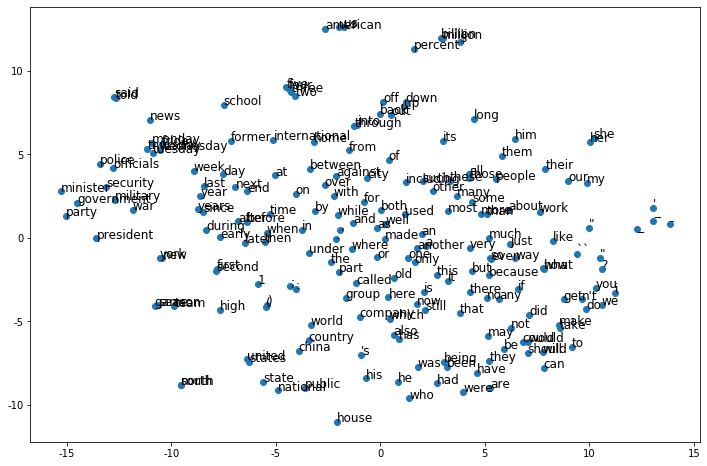

In [ ]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"], df["y"])

for word, pos in list(df.iterrows()):
    ax.annotate(word, pos, fontsize=12)
plt.show()